In [ ]:
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, Input
from tensorflow import keras
from keras.models import Model, Sequential
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot as plt

In [ ]:
(xTrain, yTrain), (xTest, yTest)=cifar10.load_data()

In [ ]:
X=np.concatenate((xTrain,xTest))
y=np.concatenate((yTrain,yTest))
xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size=0.33)
print(xTrain.shape)
print(xTest.shape)
print(yTrain.shape)
print(yTest.shape)

(40200, 32, 32, 3)
(19800, 32, 32, 3)
(40200, 1)
(19800, 1)


In [ ]:
xTrain=xTrain.astype('float32')/255
xTest=xTest.astype('float32')/255
yTrain = to_categorical(yTrain, 10)
yTest = to_categorical(yTest, 10)

In [ ]:
def CIFARmodel(blocks, doBatchNorm, denseLayers, lossFunc, optim, iter):
  
  model=Sequential()
  model.add(Input(shape=(32,32,3)))
  for i in range(blocks):
    model.add(layers.Conv2D((i+1)*32, 3, activation='relu', padding='same'))
    if(doBatchNorm==True):
      model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D())

  model.add(layers.Flatten())
  for i in range(denseLayers-1,0,-1):
    model.add(layers.Dense(64*i, activation='relu'))

  model.add(layers.Dense(10, activation='softmax'))
  # print(model.summary())
  model.compile(
      loss=lossFunc,
      optimizer=optim,
      metrics=["accuracy"],
  )
  history=model.fit(xTrain, yTrain, epochs=iter, verbose=2, validation_split=0.1)
  result=model.evaluate(xTest, yTest, verbose=2)
  return model, history, result

lossFunc=keras.losses.CategoricalCrossentropy()
optim=keras.optimizers.SGD(lr=0.001)
results=[]
models=[]
historyList=[]

In [ ]:
def plotAccLoss(history, epochs):
  plt.plot(list(range(1, epochs+1)), history.history['loss'], label='Training Loss')
  plt.plot(list(range(1, epochs+1)), history.history['val_loss'], label='Validation Loss')
  plt.plot(list(range(1, epochs+1)), history.history['accuracy'], label='Training Accuracy')
  plt.plot(list(range(1, epochs+1)), history.history['val_accuracy'], label='Validation Accuracy')
  plt.legend()
  plt.xlabel('epochs')
  plt.ylabel('loss and accuracy')
  plt.show()


## Batch Normalization, 1 Block of Layers, 1 Dense Layer

In [ ]:
epochs=5
keras.backend.clear_session()
model, history, result=CIFARmodel(1, True, 1, lossFunc, optim, epochs)
models.append(model)
historyList.append(history)
results.append(result)

Epoch 1/5
1131/1131 - 34s - loss: 1.7455 - accuracy: 0.3790 - val_loss: 1.5569 - val_accuracy: 0.4418
Epoch 2/5
1131/1131 - 33s - loss: 1.4648 - accuracy: 0.4820 - val_loss: 1.4094 - val_accuracy: 0.5045
Epoch 3/5
1131/1131 - 34s - loss: 1.3597 - accuracy: 0.5207 - val_loss: 1.4010 - val_accuracy: 0.5002
Epoch 4/5
1131/1131 - 34s - loss: 1.2859 - accuracy: 0.5500 - val_loss: 1.3328 - val_accuracy: 0.5336
Epoch 5/5
1131/1131 - 34s - loss: 1.2294 - accuracy: 0.5727 - val_loss: 1.3200 - val_accuracy: 0.5299
619/619 - 6s - loss: 1.3176 - accuracy: 0.5372


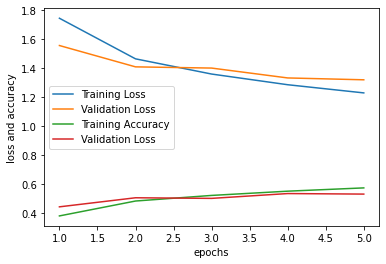

In [ ]:
plotAccLoss(history, epochs)

## No Normalization, 1 Block of Layers, 1 Dense Layer



Epoch 1/5
1131/1131 - 23s - loss: 2.2272 - accuracy: 0.2034 - val_loss: 2.1551 - val_accuracy: 0.2585
Epoch 2/5
1131/1131 - 22s - loss: 2.0894 - accuracy: 0.2797 - val_loss: 2.0286 - val_accuracy: 0.2831
Epoch 3/5
1131/1131 - 22s - loss: 1.9934 - accuracy: 0.3099 - val_loss: 1.9573 - val_accuracy: 0.3092
Epoch 4/5
1131/1131 - 23s - loss: 1.9366 - accuracy: 0.3285 - val_loss: 1.9141 - val_accuracy: 0.3226
Epoch 5/5
1131/1131 - 23s - loss: 1.9005 - accuracy: 0.3419 - val_loss: 1.8857 - val_accuracy: 0.3363
619/619 - 5s - loss: 1.8851 - accuracy: 0.3467


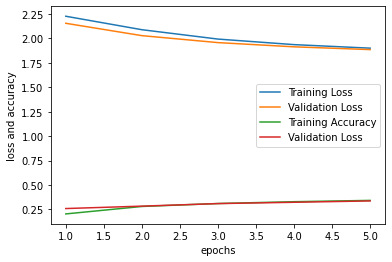

In [ ]:
keras.backend.clear_session()

model, history, result=CIFARmodel(1, False, 1, lossFunc, optim, epochs)
models.append(model)
historyList.append(history)
results.append(result)
plotAccLoss(history, epochs)

## Batch Normalization, 1 Block of Layers, 2 Dense Layers



Epoch 1/5
1131/1131 - 38s - loss: 1.8406 - accuracy: 0.3446 - val_loss: 1.6205 - val_accuracy: 0.4206
Epoch 2/5
1131/1131 - 37s - loss: 1.5229 - accuracy: 0.4610 - val_loss: 1.4641 - val_accuracy: 0.4679
Epoch 3/5
1131/1131 - 37s - loss: 1.3856 - accuracy: 0.5101 - val_loss: 1.3856 - val_accuracy: 0.5000
Epoch 4/5
1131/1131 - 37s - loss: 1.2832 - accuracy: 0.5503 - val_loss: 1.3173 - val_accuracy: 0.5348
Epoch 5/5
1131/1131 - 37s - loss: 1.2078 - accuracy: 0.5742 - val_loss: 1.2678 - val_accuracy: 0.5577
619/619 - 6s - loss: 1.2817 - accuracy: 0.5431


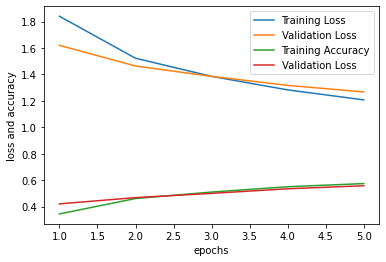

In [ ]:
keras.backend.clear_session()

model, history, result=CIFARmodel(1, True, 2, lossFunc, optim, epochs)
models.append(model)
historyList.append(history)
results.append(result)
plotAccLoss(history, epochs)

## Batch Normalization, 2 Block of Layers, 1 Dense Layer


Epoch 1/5
1131/1131 - 69s - loss: 1.7553 - accuracy: 0.3980 - val_loss: 1.5011 - val_accuracy: 0.4684
Epoch 2/5
1131/1131 - 68s - loss: 1.3800 - accuracy: 0.5149 - val_loss: 1.4998 - val_accuracy: 0.4724
Epoch 3/5
1131/1131 - 68s - loss: 1.2413 - accuracy: 0.5643 - val_loss: 1.3104 - val_accuracy: 0.5415
Epoch 4/5
1131/1131 - 68s - loss: 1.1533 - accuracy: 0.5978 - val_loss: 1.2922 - val_accuracy: 0.5562
Epoch 5/5
1131/1131 - 68s - loss: 1.0851 - accuracy: 0.6231 - val_loss: 1.1638 - val_accuracy: 0.5960
619/619 - 10s - loss: 1.1874 - accuracy: 0.5809


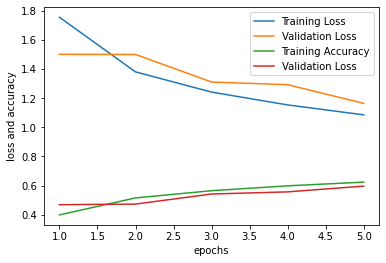

In [ ]:
keras.backend.clear_session()

model, history, result=CIFARmodel(2, True, 1, lossFunc, optim, epochs)
models.append(model)
historyList.append(history)
results.append(result)
plotAccLoss(history, epochs)

## Batch Normalization, 3 Block of Layers, 1 Dense Layer


Epoch 1/5
1131/1131 - 89s - loss: 1.7751 - accuracy: 0.3940 - val_loss: 1.5568 - val_accuracy: 0.4540
Epoch 2/5
1131/1131 - 88s - loss: 1.3846 - accuracy: 0.5097 - val_loss: 1.4089 - val_accuracy: 0.4896
Epoch 3/5
1131/1131 - 89s - loss: 1.2456 - accuracy: 0.5633 - val_loss: 1.3848 - val_accuracy: 0.5102
Epoch 4/5
1131/1131 - 88s - loss: 1.1533 - accuracy: 0.5967 - val_loss: 1.2251 - val_accuracy: 0.5774
Epoch 5/5
1131/1131 - 88s - loss: 1.0853 - accuracy: 0.6198 - val_loss: 1.2321 - val_accuracy: 0.5711
619/619 - 13s - loss: 1.2231 - accuracy: 0.5701


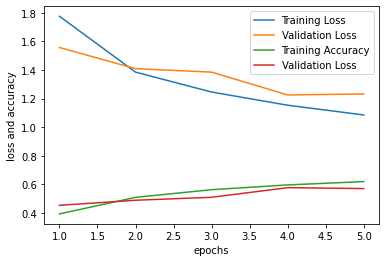

In [ ]:
keras.backend.clear_session()

model, history, result=CIFARmodel(3, True, 1, lossFunc, optim, epochs)
models.append(model)
historyList.append(history)
results.append(result)
plotAccLoss(history, epochs)

## Best Model

In [ ]:
resultArr=np.array(results)
optimalIdx=np.argmax(resultArr[:,1])
print(models[optimalIdx].summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0

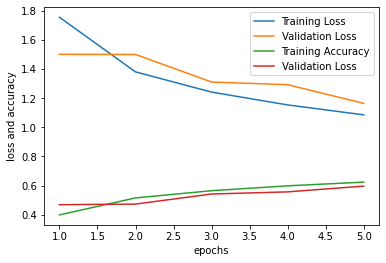

In [ ]:
plotAccLoss(historyList[optimalIdx], epochs)

In [ ]:
models[optimalIdx].save('BestModel.h5')

INFO:tensorflow:Assets written to: BestModel/assets


## Accuracies
---
|Batch Normalization| Num of Blocks  | Dense Layers  | Test Accuracy |
| :---:              | :----:         | :----:        | :---:  |
|Yes                | 1              | 1             | 53.72 |
|No                 | 1              | 1             | 34.67 |
|Yes                | 1              | 2             | 54.31 |
|Yes                | 2              | 1             | 58.09 |
|Yes                | 3              | 1             | 57.01 |

